#Directory, Libraries and Data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model


In [2]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
#load the data
df = pd.read_csv("CC GENERAL.csv").dropna()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


#Gaussian Mixture Model

In [4]:
#Creating DF without CustomerID
data = df.iloc[:,1:]
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Text(0.5, 0, 'number of components')

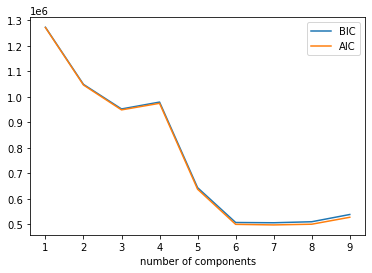

In [5]:
#Finding Optimal Number of clusters
n_components = np.arange(1,10)

#Model loop
models = [GaussianMixture(n_components= n,
                          random_state = 1502).fit(data) for n in n_components]
#Plotting
plt.plot(n_components,
         [m.bic(data) for m in models],
         label = 'BIC')
plt.plot(n_components,
         [m.aic(data) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('number of components')

In [6]:
#Gaussian Mixture Model
model = GaussianMixture(n_components= 6,
                        random_state = 1502).fit(data)

#Interpretation

In [7]:
#Prediction
cluster = pd.Series(model.predict(data))
df['Cluster'] = cluster
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0


In [8]:
#how many people per cluster
df.Cluster.value_counts()

5.0    2499
3.0    1852
1.0    1613
4.0    1287
0.0     907
2.0     181
Name: Cluster, dtype: int64

In [10]:
#Interpretation
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,1:-1].columns))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1443.108344,0.885714,1108.249325,749.040503,359.208822,1912.298662,0.564578,0.277613,0.372170,0.266224,6.157710,15.438936,4237.934181,2567.800588,652.751639,0.142085,10.708194
1,161.867870,0.643264,678.051214,357.187733,320.863482,0.000000,0.521176,0.141998,0.382343,0.000000,0.000000,9.012404,3772.225632,893.738156,140.270531,0.329066,11.117166
2,4374.282446,0.932534,7050.017016,4396.617911,2667.877967,4021.337855,0.672585,0.357336,0.566264,0.248649,12.748440,61.518362,9399.091040,11024.870021,5686.913604,0.181783,11.571571
3,2181.706299,0.901941,0.000000,0.000000,0.000000,1987.797005,0.000000,0.000000,0.000000,0.277168,6.250398,0.000000,4038.595827,1670.740096,737.076544,0.046143,11.347262
4,3266.589778,1.000000,956.390990,552.584358,403.806631,1673.382904,0.569120,0.250654,0.412494,0.270242,6.356231,16.981515,5320.950000,1684.513300,2045.807515,0.000000,12.000000
5,1099.689387,1.000000,1585.495882,917.506013,667.989868,0.000000,0.772287,0.340255,0.595735,0.000000,0.000000,25.612402,4706.340160,1552.137338,545.838901,0.220209,12.000000


In [ ]:
#Name the Segments
#Cluster 0: Lower Middle Class
#Cluster 1: Inactive 
#Cluster 2: High Rollers
#Cluster 3: Conscious high Income
#Cluster 4: Upper middle Class
#Cluster 5: Active purchasers